# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」をダウンドードします。

In [2]:
!curl -OL https://github.com/enakai00/jupyter_ml4se/raw/master/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   139  100   139    0     0    139      0  0:00:01 --:--:--  0:00:01  1022
100 47187  100 47187    0     0  47187      0  0:00:01 --:--:--  0:00:01 47187


画像ファイル「photo.jpg」を読み込みます。

In [0]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

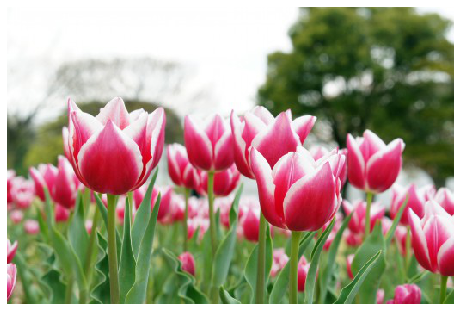

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [0]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [0]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print "Initial centers:",
    print map(lambda x: x.tolist(), center)
    print "========================"
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print map(lambda x: x.tolist(), center)
        print "Distortion: J=%d" % distortion_new

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print "Done."
    return new_pixels

例として、2つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 2)

Initial centers: [[33, 102, 37], [172, 5, 216]]
[[94, 104, 58], [228, 186, 197]]
Distortion: J=4892038575
[[106, 95, 59], [231, 209, 215]]
Distortion: J=1033843994
[[110, 96, 62], [233, 216, 220]]
Distortion: J=915569494
[[112, 96, 63], [234, 218, 222]]
Distortion: J=901837029
[[112, 96, 64], [234, 219, 223]]
Distortion: J=899539273
[[112, 96, 64], [234, 219, 223]]
Distortion: J=899089043
Done.


結果を画像として表示します。

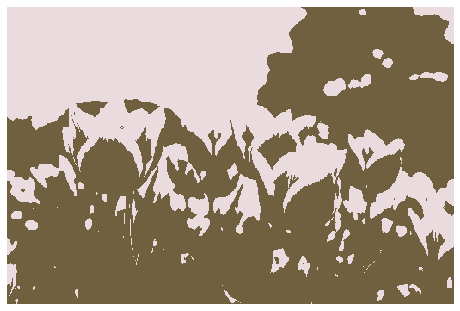

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 3)

Initial centers: [[193, 69, 158], [142, 244, 148], [120, 249, 166]]
[[124, 87, 69], [198, 206, 187], [0, 0, 0]]
Distortion: J=3490802921
[[120, 99, 66], [230, 215, 218], [33, 59, 19]]
Distortion: J=1035433777
[[132, 103, 74], [234, 219, 223], [46, 72, 27]]
Distortion: J=730466401
[[141, 105, 81], [235, 222, 226], [54, 80, 31]]
Distortion: J=671047149
[[148, 105, 86], [236, 225, 228], [61, 85, 35]]
Distortion: J=639841813
[[154, 105, 90], [237, 226, 229], [66, 89, 38]]
Distortion: J=620564555
[[160, 104, 93], [237, 227, 230], [69, 92, 40]]
Distortion: J=608173110
[[164, 103, 96], [237, 228, 230], [72, 95, 42]]
Distortion: J=599533912
[[168, 101, 98], [237, 228, 231], [74, 97, 44]]
Distortion: J=593517051
[[172, 99, 99], [237, 228, 231], [76, 98, 46]]
Distortion: J=589065839
[[175, 97, 100], [237, 229, 231], [77, 100, 47]]
Distortion: J=585843457
[[177, 95, 100], [237, 229, 231], [78, 101, 48]]
Distortion: J=583510384
[[179, 94, 100], [237, 229, 231], [79, 102, 49]]
Distortion: J=5820835

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

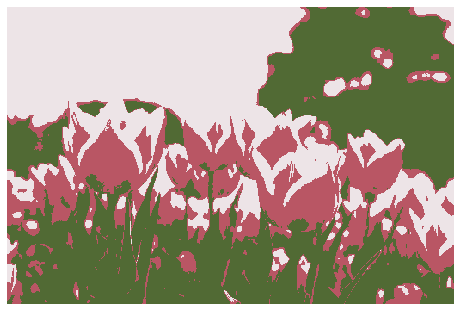

In [11]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [12]:
result = run_kmeans(pixels, 8)

Initial centers: [[88, 73, 181], [146, 67, 124], [131, 129, 249], [12, 159, 17], [252, 97, 10], [37, 237, 12], [10, 171, 179], [227, 85, 229]]
[[0, 0, 0], [145, 102, 83], [214, 218, 214], [62, 93, 37], [206, 13, 44], [130, 167, 47], [0, 0, 0], [243, 220, 229]]
Distortion: J=2386688625
[[20, 44, 13], [155, 118, 107], [212, 184, 191], [65, 93, 40], [185, 27, 59], [115, 146, 78], [0, 0, 0], [247, 244, 245]]
Distortion: J=434608008
[[31, 56, 18], [179, 121, 121], [214, 178, 187], [70, 97, 41], [184, 30, 61], [109, 137, 78], [10, 19, 6], [246, 245, 245]]
Distortion: J=221612314
[[37, 62, 21], [190, 119, 128], [213, 180, 189], [72, 101, 43], [182, 29, 59], [110, 136, 79], [13, 34, 10], [245, 244, 245]]
Distortion: J=190312138
[[41, 66, 23], [198, 115, 132], [213, 183, 190], [75, 104, 45], [181, 28, 57], [112, 137, 81], [19, 43, 12], [246, 244, 245]]
Distortion: J=180443591
[[45, 70, 25], [205, 110, 133], [212, 185, 191], [78, 107, 46], [180, 28, 56], [115, 139, 84], [22, 47, 14], [246, 245, 

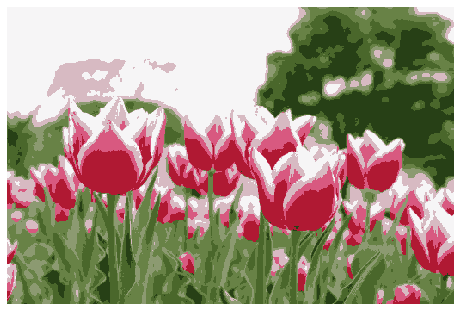

In [13]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [14]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308k  100  308k    0     0   308k      0  0:00:01 --:--:--  0:00:01  417k


ダウンロードしたファイルを確認します。

In [15]:
!ls *.png

sweets_fruit_pafe.png


ファイルを読み込んで表示します。

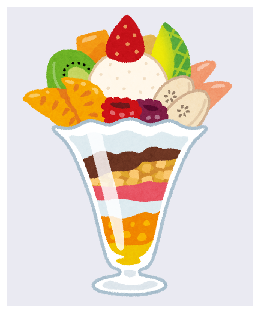

In [16]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [17]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers: [[205, 44, 99], [92, 206, 166], [2, 79, 11], [249, 129, 90], [145, 16, 98]]
[[204, 34, 42], [215, 228, 214], [0, 0, 0], [235, 176, 74], [113, 44, 43]]
Distortion: J=5386008593
[[209, 39, 48], [232, 232, 227], [0, 0, 0], [223, 168, 41], [107, 81, 45]]
Distortion: J=789969540
[[210, 40, 49], [231, 231, 226], [0, 0, 0], [232, 168, 38], [109, 102, 46]]
Distortion: J=602481067
[[209, 40, 50], [231, 231, 226], [0, 0, 0], [233, 168, 36], [110, 105, 46]]
Distortion: J=582890168
[[206, 40, 50], [231, 231, 225], [0, 0, 0], [233, 168, 36], [110, 108, 46]]
Distortion: J=582037140
[[200, 39, 52], [231, 231, 225], [0, 0, 0], [233, 168, 36], [109, 115, 44]]
Distortion: J=580894897
[[197, 39, 53], [231, 231, 225], [0, 0, 0], [234, 167, 36], [108, 119, 43]]
Distortion: J=577728267
[[196, 39, 52], [231, 231, 225], [0, 0, 0], [234, 167, 36], [108, 122, 43]]
Distortion: J=576764677
[[196, 39, 52], [231, 231, 225], [0, 0, 0], [234, 167, 35], [108, 122, 44]]
Distortion: J=576530905
Done.


結果を表示して確認します。

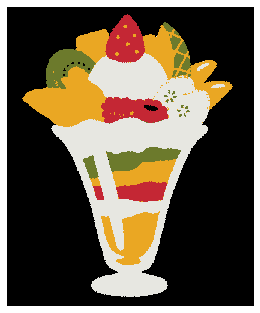

In [18]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)